<a href="https://colab.research.google.com/github/dalexa10/Python_4_Data_Science/blob/main/GLM/generalized_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistical modeling
Import packages first

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt 
import math

##Example 1: Psych Data


In [ ]:
with open('psych.txt', 'r') as f:
  psych = pd.read_csv(f, sep=" ")
# psych.columns
# psych.head
psych.shape

(45, 6)

In [ ]:
endog = psych.iloc[:,0] #y: ill
exog = sm.add_constant(psych.iloc[:,1:6]) # x1-x5 with the interception

psychfit1 = sm.GLM(endog, exog, family=sm.families.Binomial())
result1 = psychfit1.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       39
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.827
Date:                Tue, 14 Feb 2023   Deviance:                       25.653
Time:                        18:07:04   Pearson chi2:                     39.8
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2226      6.332      2.404      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# In another way
logistic_model = logit('ill ~ x1+x2+x3+x4+x5',psych)
result = logistic_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285038
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    ill   No. Observations:                   45
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.5522
Time:                        18:07:41   Log-Likelihood:                -12.827
converged:                       True   LL-Null:                       -28.643
Covariance Type:            nonrobust   LLR p-value:                 7.023e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2226      6.332      2.404      0.016       2.812      27.633
x1            -0.6757      0.

In [ ]:
# Try using the total score only.
endog = psych.iloc[:,0] #y: ill
np.sum(psych.iloc[:,1:6], axis=1) # calcuate the row sum
exog = sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1))

psychfit2 = sm.GLM(endog, exog, family=sm.families.Binomial())
result2 = psychfit2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.686
Date:                Tue, 14 Feb 2023   Deviance:                       27.373
Time:                        18:08:15   Pearson chi2:                     54.7
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0331      3.145      3.190      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


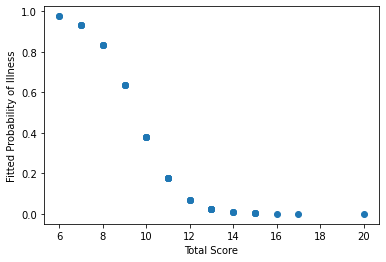

In [ ]:
# Plot fitted probabilities of illness versus the total score:
def p(x):   # Calcuate the fitted probabilities
    e = result2.params["const"]+result2.params[0]*x
    return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p, np.sum(psych.iloc[:,1:6], axis=1))) 

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


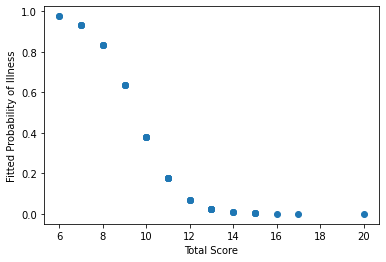

In [ ]:
# Plot fitted probabilities of illness versus the total score:
fitprob = result2.predict(sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1)))

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 